In [1]:
from sklearn.metrics import accuracy_score
import pandas as pd
from copy import deepcopy
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from copy import deepcopy

In [2]:
exp_path = "./output/Suzuki_Miyaura_f0/"

representations_last =  pd.read_csv(f"{exp_path}last_layer_representations.csv")
representations_last.head()

,rsmiles,psmiles,entry_no_0,entry_no_1,entry_no_2,entry_no_3,entry_no_4,entry_no_5,entry_no_6,entry_no_7,...,entry_no_990,entry_no_991,entry_no_992,entry_no_993,entry_no_994,entry_no_995,entry_no_996,entry_no_997,entry_no_998,entry_no_999
0,[CH3:12][c:13]1[cH:14][cH:15][c:16]2[c:17]([cH...,[c:2]1(-[c:27]2[c:13]([CH3:12])[cH:14][cH:15][...,-0.038611,-0.027287,-0.018625,-0.085846,-0.067643,-0.059935,0.303646,-0.085275,...,0.500430,-0.078321,0.304996,0.419766,-0.030556,-0.104156,-0.130061,-0.062375,0.889367,-0.036160
1,[CH3:1][c:2]1[cH:3][cH:4][c:5]2[c:6]([cH:7][n:...,[CH3:1][c:2]1[cH:3][cH:4][c:5]2[c:6]([cH:7][n:...,-0.083940,-0.080607,-0.028348,-0.019398,-0.061027,-0.100139,-0.047237,0.558952,...,-0.065685,-0.134517,0.150565,0.388409,-0.053134,-0.002505,-0.065021,0.064774,0.436405,-0.019936
2,[CH3:1][c:2]1[cH:3][cH:4][c:5]2[c:6]([cH:7][n:...,[CH3:1][c:2]1[cH:3][cH:4][c:5]2[c:6]([cH:7][n:...,-0.056195,-0.070893,-0.059916,-0.029630,-0.078771,-0.023994,-0.044335,-0.078742,...,1.668338,-0.040137,-0.048192,-0.108218,-0.074206,-0.120281,-0.107091,0.143530,0.219437,-0.036593
3,[CH3:1][c:2]1[cH:3][cH:4][c:5]2[c:6]([cH:7][n:...,[CH3:1][c:2]1[cH:3][cH:4][c:5]2[c:6]([cH:7][n:...,-0.047542,-0.112176,-0.028604,0.041430,-0.082744,-0.045255,-0.094342,-0.004554,...,0.826053,-0.044624,-0.011155,-0.075974,-0.105489,-0.053404,-0.128835,-0.070041,0.476287,-0.013290
4,[CH3:1][c:2]1[cH:3][cH:4][c:5]2[c:6]([cH:7][n:...,[CH3:1][c:2]1[cH:3][cH:4][c:5]2[c:6]([cH:7][n:...,-0.065032,-0.073469,-0.068607,-0.041078,-0.093878,0.373070,-0.087680,-0.059866,...,1.164754,-0.049152,-0.040639,-0.095454,-0.097299,-0.118929,-0.062147,0.092886,0.416147,-0.079482


In [3]:
data_train_preds = pd.read_csv(f"{exp_path}Suzuki_Miyaura_f0_test_preds.csv")

In [5]:
representations_last_copy = deepcopy(representations_last)

entries_names = representations_last_copy.iloc[:,2:].columns

for column in entries_names:
    representations_last_copy[column] = (representations_last_copy[column] - np.mean(representations_last_copy[column] ))/np.std(representations_last_copy[column] )

representations_last_copy.head()

,rsmiles,psmiles,entry_no_0,entry_no_1,entry_no_2,entry_no_3,entry_no_4,entry_no_5,entry_no_6,entry_no_7,...,entry_no_990,entry_no_991,entry_no_992,entry_no_993,entry_no_994,entry_no_995,entry_no_996,entry_no_997,entry_no_998,entry_no_999
0,[CH3:12][c:13]1[cH:14][cH:15][c:16]2[c:17]([cH...,[c:2]1(-[c:27]2[c:13]([CH3:12])[cH:14][cH:15][...,0.222647,0.090910,-0.204733,-0.317713,-0.685740,-0.366428,2.405150,-0.472804,...,0.593186,-0.519307,0.894618,3.449396,0.519096,-0.755618,-0.751028,-0.554259,3.960757,-0.180323
1,[CH3:1][c:2]1[cH:3][cH:4][c:5]2[c:6]([cH:7][n:...,[CH3:1][c:2]1[cH:3][cH:4][c:5]2[c:6]([cH:7][n:...,-0.573523,-0.280845,-0.274204,0.009920,-0.660791,-0.550727,-0.145488,1.766693,...,-0.574708,-0.827184,0.199214,3.229004,0.137062,-0.020222,-0.216114,0.527488,1.848327,0.023390
2,[CH3:1][c:2]1[cH:3][cH:4][c:5]2[c:6]([cH:7][n:...,[CH3:1][c:2]1[cH:3][cH:4][c:5]2[c:6]([cH:7][n:...,-0.086196,-0.213119,-0.499753,-0.040531,-0.727711,-0.201672,-0.124389,-0.450096,...,3.002573,-0.310110,-0.695792,-0.261510,-0.219472,-0.872270,-0.562112,1.197520,0.836475,-0.185758
3,[CH3:1][c:2]1[cH:3][cH:4][c:5]2[c:6]([cH:7][n:...,[CH3:1][c:2]1[cH:3][cH:4][c:5]2[c:6]([cH:7][n:...,0.065789,-0.500950,-0.276033,0.309850,-0.742697,-0.299135,-0.487904,-0.192199,...,1.264943,-0.334695,-0.529013,-0.034887,-0.748797,-0.388453,-0.740949,-0.619477,2.034317,0.106842
4,[CH3:1][c:2]1[cH:3][cH:4][c:5]2[c:6]([cH:7][n:...,[CH3:1][c:2]1[cH:3][cH:4][c:5]2[c:6]([cH:7][n:...,-0.241416,-0.231082,-0.561851,-0.096977,-0.784687,1.618492,-0.439477,-0.384477,...,1.963682,-0.359502,-0.661777,-0.171799,-0.610226,-0.862493,-0.192478,0.766656,1.753850,-0.724291


In [6]:
X2D = representations_last_copy[entries_names].to_numpy()
X_embedded2D = TSNE(n_components=2, perplexity=500).fit_transform(X2D)
X_embedded2D.shape

(4032, 2)

No handles with labels found to put in legend.


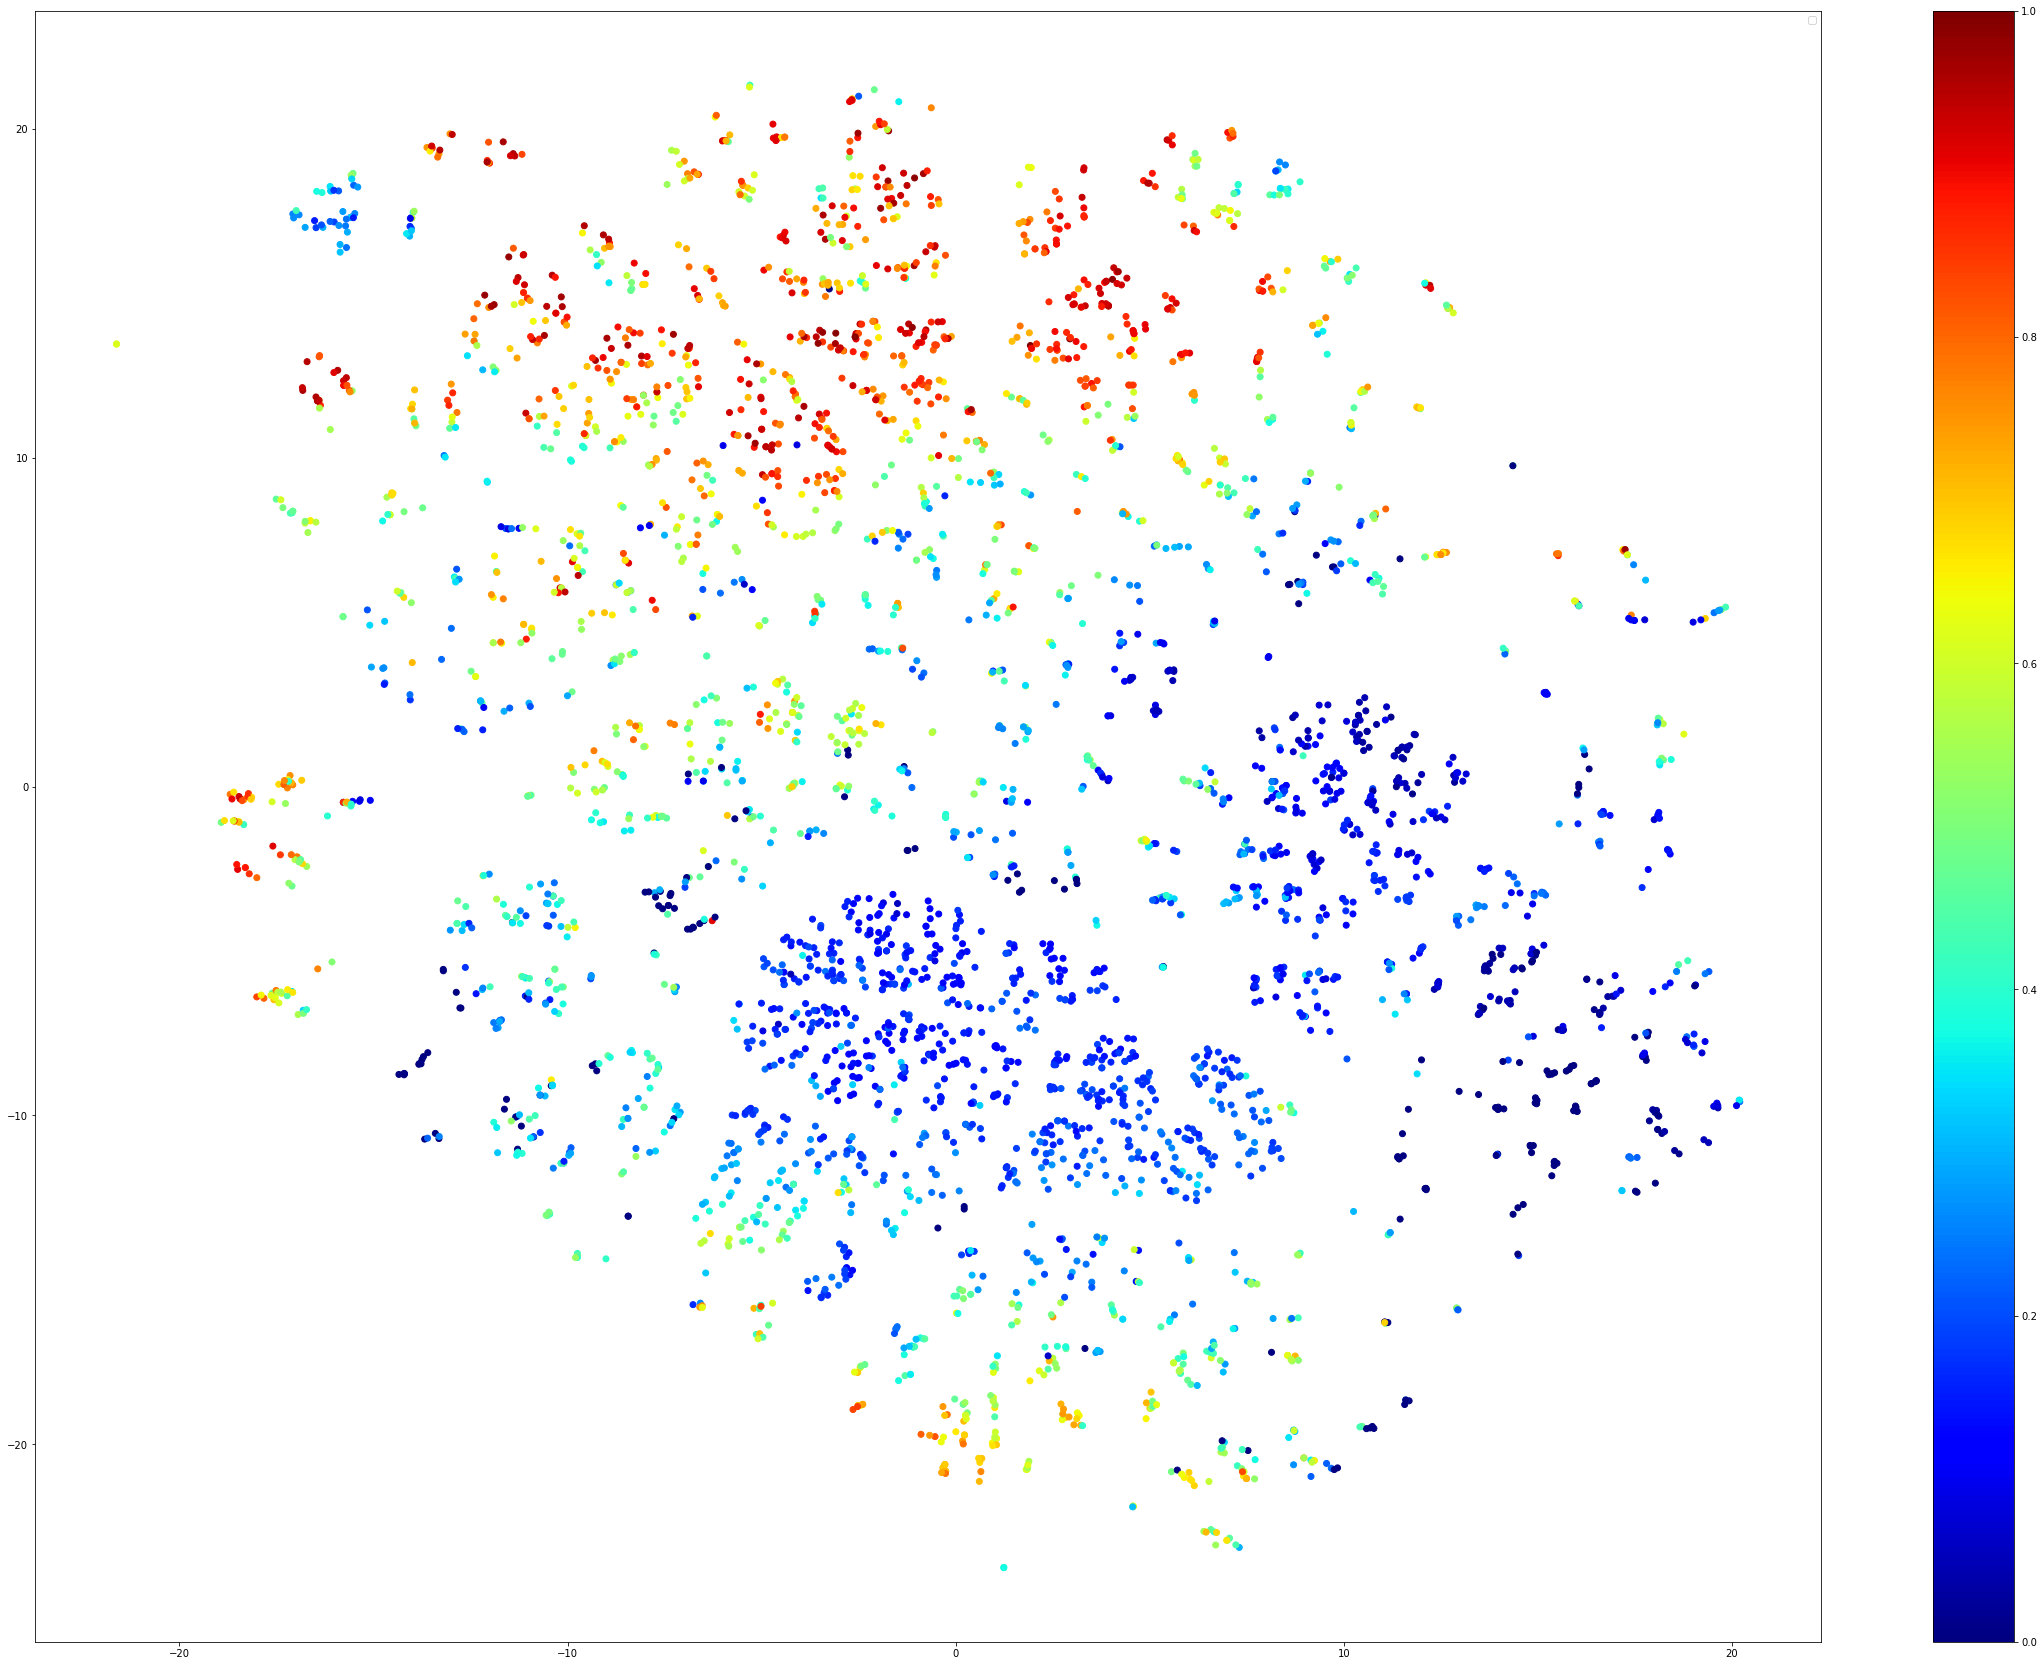

In [7]:
figure = plt.figure(figsize=(40,30))
plt.scatter(X_embedded2D.T[0], X_embedded2D.T[1], c=data_train_preds['label'], cmap = 'jet')
plt.legend()
plt.colorbar()
plt.show()

In [26]:
X3D = representations_last_copy[entries_names].to_numpy()
X_embedded3D = TSNE(n_components=3, perplexity=100).fit_transform(X3D)
X_embedded3D.shape

(4032, 3)

In [27]:
def present_in_2D(data_train_preds, X_embedded2D):
    figure = plt.figure(figsize=(40,30))
    plt.scatter(X_embedded2D.T[0], X_embedded2D.T[1], c=data_train_preds['label'], cmap = 'jet')
    plt.legend()
    plt.colorbar()
        
    return plt.show()

def present_in_3D(data_train_preds, X_embedded):
    df = pd.DataFrame(columns= ['x', 'y', 'z', 'predicted'])
    x, y, z, preds = [], [], [], []
    for j in range(len(X_embedded)):
        x.append(X_embedded[j][0])
        y.append(X_embedded[j][1])
        z.append(X_embedded[j][2])

        preds.append(data_train_preds['label'][j])

    df['x'] = x
    df['y'] = y
    df['z'] = z
    df['label'] = preds

    fig = px.scatter_3d(df, x='x', y='y', z='z', color='label')

    return fig, df

fig1, df = present_in_3D(data_train_preds, X_embedded3D)
fig1.show()

# Middle layer clustering

In [10]:
representations = pd.read_csv(f"{exp_path}middle_layer_representations.csv")
representations_copy = deepcopy(representations)

entries_names = representations_copy.iloc[:,2:].columns

for column in entries_names:
    representations_copy[column] = (representations_copy[column] - np.mean(representations_copy[column] ))/np.std(representations_copy[column] )

representations_copy.head()

,rsmiles,psmiles,entry_no_0,entry_no_1,entry_no_2,entry_no_3,entry_no_4,entry_no_5,entry_no_6,entry_no_7,...,entry_no_990,entry_no_991,entry_no_992,entry_no_993,entry_no_994,entry_no_995,entry_no_996,entry_no_997,entry_no_998,entry_no_999
0,[CH3:12][c:13]1[cH:14][cH:15][c:16]2[c:17]([cH...,[c:2]1(-[c:27]2[c:13]([CH3:12])[cH:14][cH:15][...,-0.780280,-0.497826,-0.809097,-0.722008,-0.606624,2.423664,-0.008039,1.867385,...,-0.801900,-0.622239,-1.069532,-0.520059,-0.659350,-0.454464,-0.536057,-0.878558,-0.988903,-0.846061
1,[CH3:1][c:2]1[cH:3][cH:4][c:5]2[c:6]([cH:7][n:...,[CH3:1][c:2]1[cH:3][cH:4][c:5]2[c:6]([cH:7][n:...,-1.107727,-0.995476,-0.030344,-0.988021,-0.851108,1.264040,-0.291805,1.587013,...,-0.969861,-0.720330,-0.222971,-0.704980,-0.888771,-0.691931,-0.810579,1.391736,-1.044204,-0.943469
2,[CH3:1][c:2]1[cH:3][cH:4][c:5]2[c:6]([cH:7][n:...,[CH3:1][c:2]1[cH:3][cH:4][c:5]2[c:6]([cH:7][n:...,-0.833137,-0.548003,-0.853575,1.157382,-0.710199,0.931882,0.232317,0.853397,...,1.762916,-0.712062,-1.181662,-0.669682,-1.032013,-0.852643,-0.805093,-0.990440,-1.026451,-0.898851
3,[CH3:1][c:2]1[cH:3][cH:4][c:5]2[c:6]([cH:7][n:...,[CH3:1][c:2]1[cH:3][cH:4][c:5]2[c:6]([cH:7][n:...,0.340069,-0.565338,1.541687,0.956107,0.978754,0.852538,0.084403,1.023711,...,0.835443,-0.586522,-1.069196,-0.513338,-0.295991,-0.253552,0.704808,-0.935747,-0.514271,-0.848032
4,[CH3:1][c:2]1[cH:3][cH:4][c:5]2[c:6]([cH:7][n:...,[CH3:1][c:2]1[cH:3][cH:4][c:5]2[c:6]([cH:7][n:...,1.152373,1.508329,-0.988724,0.857435,-0.637282,-0.595680,-0.093986,-0.412825,...,1.571209,1.415210,-1.073258,1.434213,1.075959,0.839256,-0.872686,-0.957105,-0.977618,-0.883781


In [22]:
X2D = representations_copy[entries_names].to_numpy()
X_embedded2D = TSNE(n_components=2, perplexity=10).fit_transform(X2D)
X_embedded2D.shape

(4032, 2)

No handles with labels found to put in legend.


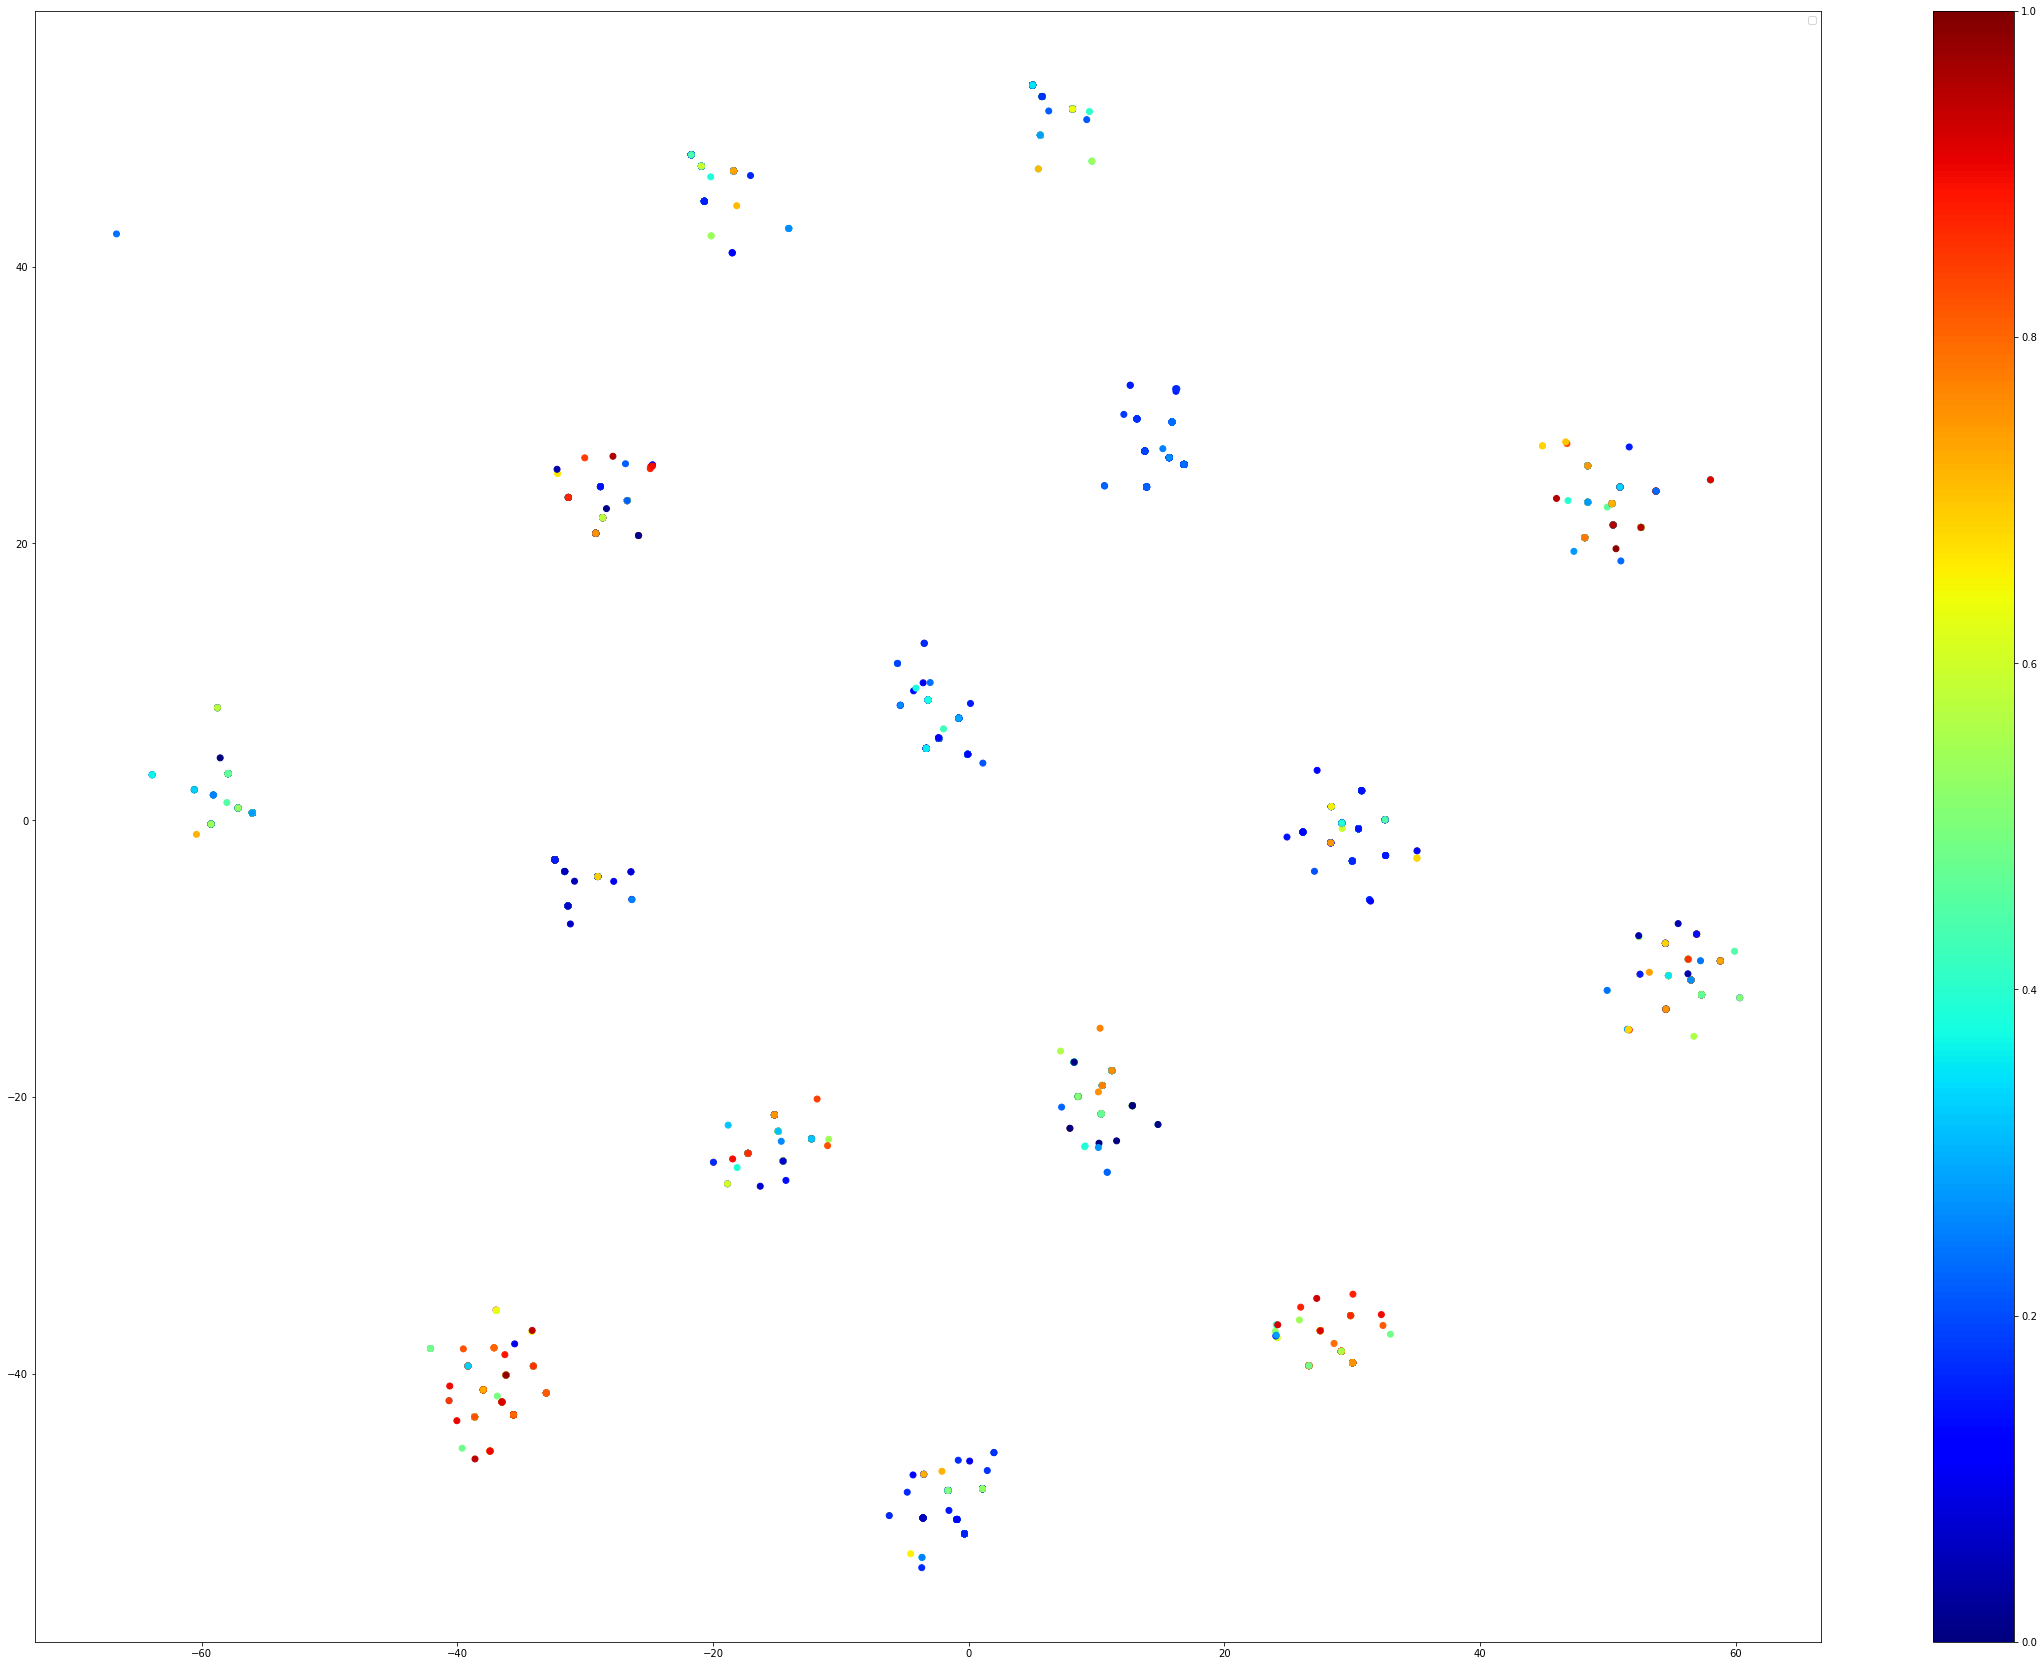

In [23]:
figure = plt.figure(figsize=(40,30))
plt.scatter(X_embedded2D.T[0], X_embedded2D.T[1], c=data_train_preds['label'], cmap = 'jet')
plt.legend()
plt.colorbar()
plt.show()

In [24]:
X3D = representations_copy[entries_names].to_numpy()
X_embedded3D = TSNE(n_components=3, perplexity=100).fit_transform(X3D)
X_embedded3D.shape

(4032, 3)

In [25]:

fig1, df = present_in_3D(data_train_preds, X_embedded3D)
fig1.show()